# Shay, Florrie & Sam's Data Science Project: MASTER NOTE BOOK
AKA The Data Science Project team of dreams 

# Introduction to the Project and Dataset


This project will analyse data from the Old Bailey Online dataset, which is the largest collection of historical trial records from London's central criminal court, containing approximately 197,745 trials from 1674 to 1913. The Old Bailey Proceedings document detailed accounts of criminal trials, including information about defendants, victims, offences, verdicts, and punishments. We obtained the dataset from the Old Bailey API at https://www.oldbaileyonline.org/.

Let's get started.

In [ ]:
#Just importing some standard modules that we'll probably need.
#import numpy as np 
#import matplotlib.pyplot as plt
#plt.style.use ('fivethirtyeight')
#import seaborn as sns
#import pandas as pd
#from scipy import stats
#pd.set_option ('mode.copy_on_write', True)

# make sure you install the requirements.txt file to run this notebook!

# Data Acquisition and Cleaning

The Old Bailey's data is formatted through a variety of XML files. XML files are useful because they allow historical records to be stored in a structured, hierarchical format that preserves relationships between people and events and metadata. Which is important when you are trying to format your data in a way that you could look up certain statistics for the Old Bailey. Now, XML files are somewhat finicky unless you know how to clean them.

Now, calling the below "data cleaning" may seem slightly disingenuous given we are selectively extracting particular variables, as opposed to correcting errors in the data itself. But, I digress. 

The first thing we need to do is get our imports and installs sorted.


In [ ]:
#!pip install pandas
#!pip install word2number

#import xml.etree.ElementTree as ET # We need to import ElementTree to extract XML files, which is the file type the Old Bailey works with. 
# It will allow us to parse the XML files and directly pull their elements, as opposed to us using NLP (or something equally as troublesome)

#from pathlib import Path # Pathlib will be important because we are analysing a LOT of XML files, and we'll need to be doing checks throughout to see if all is well

#import pandas as pd
#import csv
#import re
#from collections import Counter
#from word2number import w2n


ModuleNotFoundError: No module named 'word2number'

Now, let's first just get all the files in one place and check we have all of them. Given the sheer quantity the Old Bailey database contains.

In [ ]:
#input_dir = Path('.') # Given how many files we are working with, we can't actually keep the files in the GitHub. 
# As such, we are using the pathlib function just in case things end up breaking down across computers.

#da_xml_files = list(input_dir.glob('*.xml')) 
# This will search the folder for all files ending with '.xml', thus finding all the files we need. 
# Listing them would be a bit problematic given how many there are. 
# It then creates a file called 'da_xml_files', which contains the name of all those files. 

#print(f"Found {len(da_xml_files)} files") # This will double check how many files we have. 

## The Function of Time

Right, so, the most important piece of information we can extract from the XML files is the date of the various sessions. Without this, we won't be able to do much analysis at all as it all will be a function of time. So, we are going to create a function that extracts the session date and year from the tags within the files. 

In [ ]:
#def if_i_could_put_time_in_a_dictionary(filepath):

    #tree = ET.parse(filepath) # This will create an ElementTree object, which is how python essentially "sees" XML files
    #tree = ET.parse(filepath) # This will create an ElementTree object, which is how python essentially "sees" XML files
    #root = tree.getroot() # This grabs the top-most tag for the XML files, and will help us find all the nested tags within it
    
    # Now we create empty strings for storage
    #session_date = ""
    #session_year = ""
    
    #for div0 in root.iter('div0'): # The Old Bailey uses <div0> to mark top-level sections, like headers, cases, etc. So it's how we will split our data points by session as opposed to absorbing all of one XML file into a big mess

     #   if div0.get('type') == 'sessionsPaper': # This checks if the <div0> element has the attribute which is describing a court session with date and time. Otherwise, we're not interested. 

      #      for interp in div0.iter('interp'): # In Old Bailey, <interp> holds those elements like date, time, etc
       #         if interp.get('type') == 'date':
        #            session_date = interp.get('value', '')
         #       elif interp.get('type') == 'year':
          #          session_year = interp.get('value', '') # Note that Old Bailey stores year and date separately. So, we need to store them separately
           # break
    
  #  if not session_year and len(session_date) >= 4: # Now, the data isn't perfect. So, if we are unable to extract the year, we can extract it from the title.
   #     session_year = session_date[:4] # The first four numbers are the year for Old Bailey
    
   # return {'date': session_date, 'year': session_year}

# Now we run the function on our XML files, and print a couple to check its all worked! 
#for xml_file in da_xml_files[:5]:
 #   filepath = input_dir / xml_file
  #  metadata = if_i_could_put_time_in_a_dictionary(filepath)
   # print(f"{xml_file}: {metadata}")

## Getting Defendant Names (Like that one scene from Shawshank Redemption)

Now, we need to extract the data on a defendant basis, and get a list of names/IDs. The reason we are doing this is because we are interested in the data being on a by-defendant basis, as opposed to a by-trial or session basis. The reason for this is some trials may have more than one defendant, or we have every row being on a per-day basis. Which doesn't really work if you want to get into demographic data.  

Some information we want is their name, their id, and their gender. If we want to test any hypothesis relating to women, we will need this data.

In [ ]:
#def dammit_dufresne_you_are_putting_me_behind(trial_elem):
 #   da_defendants = [] # Empty list to store defendant data
    
    # First, we'll create a loop that iterates over every XML name element within the trial element. 
    # Note that <persName> can be ANY name (defendant, witness, judge, etc), so we will need to do something about that
  #  for person in trial_elem.iter('persName'): 
   #     if person.get('type') == 'defendantName': # This will ensure we are only extracting defendants specifically
    #        def_id = person.get('id', '')
            
     #       given = ""
      #      surname = ""
       #     gender = ""
            
            # So, as we've established, the OldBailey XML files have tags for each defendant. 
            # It's actually quite amazing the work they've done because it is REALLY easy to extract if you know how
            # So, we create a for loop that will iterate over every value attribute (what stores defendant data) and assign the correct name and gender. 
        #    for interp in person.iter('interp'):
         #       inst = interp.get('inst')
          #      if inst == def_id:
           #         interp_type = interp.get('type')
            #        if interp_type == 'given':
             #           given = interp.get('value', '')
              #      elif interp_type == 'surname':
               #         surname = interp.get('value', '')
                #    elif interp_type == 'gender':
                 #       gender = interp.get('value', '')
            
            # Now, again, the Old Bailey data is HUGE and might not be perfect. 
            # So, just in case, we extract all the text content inside the <persName> element (which will be their name)
            # And we just put it in their name. 
            # It's not going to be perfect, but realistically, the name doesn't matter as much so we don't mind. 
            #if not given and not surname:
             #   name_text = ''.join(person.itertext()).strip()
              #  given = name_text
            
            # Now we just create our dictionary and BOOM. All done. 
            #da_defendants.append({
             #   'id': def_id,
              #  'given': given,
               # 'surname': surname,
                #'gender': gender
            })
    
   # return da_defendants

Now, let's run a quick test to make sure it all works.

In [ ]:
# Test on a particular file (when we first did this, we picked five files at random. The below file was one of those five, hence why its specific).
#tree = ET.parse(input_dir / '18411129.xml')
#root = tree.getroot()

#count = 0 # We don't need to check all the trials within the file, so we'll set up a counter. 
#for div1 in root.iter('div1'):
 #   if div1.get('type') == 'trialAccount':
  #      trial_id = div1.get('id')
   #     defs = dammit_dufresne_you_are_putting_me_behind(div1)
    #    print(f"{trial_id}: {defs}")
     #   count += 1
      #  if count >= 10: # End at 10 trials. Again, we don't need to waste time checking all of them. 
       #     break

Look there above. You can see some trials have more than one defendant. Thank god we decided to do this on a per-defendant basis, otherwise we would have been in trouble. Good luck Henry and Harriett with your trial (or rather, your t18411129)!

## What is the charge? Eating a meal? A succulent Chinese meal?

Well, defendant data is all well and good. But another key factor is the actual crime they committed, otherwise, this isn't really good court data. Thankfully, we can extract that pretty easily as well! Though, there is some further explanation we need to do before proceeding. 

See, Old Bailey breaks down crime and offence through specific categorisation. There is the Category and the Subcategory. The category is the broad type of crime committed in the trial, so the likes of theft, assault, murder, fraud, etc. The subcategory handles a more specific classification within that broad category, so for example, theft could specifically be burglary, pickpocketing, or shoplifting. Now, one thing to note is that crime definition changes over time, even over the time of decades. Hence why it is actually hard to compare temporal crime statistics (and why murder is usually very good as a baseline, because its definition rarely changes. Either you've been murdered or you haven't). 

It should be noted that some defendants don't have subcategories on their crimes, and that's fine. It's not strictly vital, and it's something that can be filtered later if necessary.


In [ ]:
# Right, so most of this stuff is the same again, so I won't go explaining everything. 
#def i_am_offended(trial_elem):
 #   get_off_fences = [] # Offence dictionary storage
  #  
   # for rs in trial_elem.iter('rs'): # Note we are using <rs> here and not <persName> because Old Bailey stores offence data inside <rs> elements
        # Specifically with type="offenceDescription"
    #    if rs.get('type') == 'offenceDescription':
     #       off_id = rs.get('id', '')
      #      category = ""
       #     subcategory = ""
        #    
         #   for interp in rs.iter('interp'):
          #      interp_type = interp.get('type')
           #     if interp_type == 'offenceCategory':
            #        category = interp.get('value', '')
             #   elif interp_type == 'offenceSubcategory':
              #      subcategory = interp.get('value', '')
            
         #   get_off_fences.append({
          #      'id': off_id,
           #     'category': category,
            #    'subcategory': subcategory
           # })
    
   # return get_off_fences

And there you have it. Now, we do the test once again to just check everything is working fine.

In [ ]:
#tree = ET.parse(input_dir / '18411129.xml')
#root = tree.getroot()

#count = 0
#for div1 in root.iter('div1'):
#    if div1.get('type') == 'trialAccount':
 #       trial_id = div1.get('id')
  #      offs = i_am_offended(div1)  
   #     print(f"{trial_id}: {offs}")
        
    #    count += 1
     #   if count >= 10:  
      #      break

As a quick side. Theft Receiving means that the defendant knowingly accepted or bought goods that had been stolen; which is still a crime. Anyway, not important (truthfully speaking, I didn't know what it was and had to look it up. And I'm explaining it just in case).

We move on.

## 1000 counts of murder? To Arkham Asylum for the hundredth time with you! 

Right, and of course, we need the actual verdict and punishment, otherwise we have no value to the offences assigned to each defendant. After all, if they were all found innocent, then the Old Bailey dataset would be quite odd indeed. 

Once again, note there are subcategories. So, you can have guilty, not guilty as categories, and "guilty of theft" or "guilty of assault" as subcategories. Regarding punishment, categories work in the form of imprisonment -> 6 month imprisonment. So, the subcategories are actually important here and we will need to properly extract them. 

In [ ]:
# Again, same old stuff. 
#def we_the_jury_find_this_code_to_be_awful(trial_elem):
 #   john_verdicts = []
    
  #  for rs in trial_elem.iter('rs'):
   #     if rs.get('type') == 'verdictDescription':
    #        ver_id = rs.get('id', '')
     #       category = ""
      #      subcategory = ""
            
       #     for interp in rs.iter('interp'):
        #        interp_type = interp.get('type')
         #       if interp_type == 'verdictCategory':
          #          category = interp.get('value', '')
           #     elif interp_type == 'verdictSubcategory':
            #        subcategory = interp.get('value', '')
            
           # john_verdicts.append({
            #    'id': ver_id,
             #   'category': category,
              #  'subcategory': subcategory
           # })
    
   # return john_verdicts

#def who_even_is_hammurabi_brah(trial_elem):
 #   arya_starks_list = [] # Storage for defendant punishments
    
  #  for rs in trial_elem.iter('rs'):
   #     if rs.get('type') == 'punishmentDescription':
    #        pun_id = rs.get('id', '')
     #       category = ""
      #      subcategory = ""
            
       #     for interp in rs.iter('interp'):
        #        interp_type = interp.get('type')
         #       if interp_type == 'punishmentCategory':
          #          category = interp.get('value', '')
           #     elif interp_type == 'punishmentSubcategory':
            #        subcategory = interp.get('value', '')
            
          #  arya_starks_list.append({
           #     'id': pun_id,
            #    'category': category,
             #   'subcategory': subcategory
         #   })
    
    #return arya_starks_list

And once again, a quick test.

In [ ]:
#tree = ET.parse(input_dir / '18411129.xml')
#root = tree.getroot()

#count = 0
#for div1 in root.iter('div1'):
 #   if div1.get('type') == 'trialAccount':
  #      trial_id = div1.get('id')
   #     verd = we_the_jury_find_this_code_to_be_awful(div1)
    #    pun = who_even_is_hammurabi_brah(div1)
        
     #   print(f"{trial_id}:")
      #  print(f"  Verdicts: {verd}")
       # print(f"  Punishments: {pun}")
        
        #count += 1
      #  if count >= 10: 
       #     break

## Victim? I hardly know him.

Right, the next thing we are going to do is extract details of the victims of each trial, similarly to how we did the defendants. This is mostly because it could yield interesting data regarding what crimes were committed on whom. After all, say a hypothesis regarding women. It's important to know the crimes being committed AGAINST women as well as by them if we want to get the full picture.

In [ ]:
#def get_victims_with_consent(trial_elem):
 #   whomst_wronged = []
    
  #  for person in trial_elem.iter('persName'):
   #     if person.get('type') == 'victimName':
    #        vic_id = person.get('id', '')
            
     #       given = ""
      #      surname = ""
       #     gender = ""
            
        #    for interp in person.iter('interp'):
         #       inst = interp.get('inst')
          #      if inst == vic_id:
           #         interp_type = interp.get('type')
            #        if interp_type == 'given':
             #           given = interp.get('value', '')
              #      elif interp_type == 'surname':
               #         surname = interp.get('value', '')
                #    elif interp_type == 'gender':
                 #       gender = interp.get('value', '')
            
           # if not given and not surname: # As we did before with defendant names. This isn't always going to perfect. But we don't necessarily need it to be. 
            #    name_text = ''.join(person.itertext()).strip()
             #   given = name_text
            
         #   whomst_wronged.append({
          #      'id': vic_id,
           #     'given': given,
            #    'surname': surname,
             #   'gender': gender
         #   })
    
   # return whomst_wronged

You know what comes next.

In [ ]:
#tree = ET.parse(input_dir / '18411129.xml')
#root = tree.getroot()

#count = 0
#for div1 in root.iter('div1'):
#    if div1.get('type') == 'trialAccount':
#        trial_id = div1.get('id')
 #       vics = get_victims_with_consent(div1)
        
  #      print(f"{trial_id}: Victims: {vics}")
        
   #     count += 1
    #    if count >= 10:  
     #       break

## Making Sense of the Madness

Now, where do we go from here? Well, we have huge lists with defendants and their crimes, victims, gender, the like. But the issue is that currently, they are all scattered about isolated. Each in their own list. What we need is code that will join this information together. We need to tell which defendant committed which offence, received which punishment, or which victims were affected. This is the process that will actually let us turn the scattered, raw XML into a dataset; in which each row can correspond to one instance of a defendant, potentially even for each of his/her/their crimes. 

In [ ]:
#def join_together_wholesome(trial_elem):
    # First off, lets create a dictionary to store all the information. A super dictionary if you will. 
 #   wholesome_joins = {
  #      'criminalCharge': [],       # This will link the defendant to the offence and its verdict
   #     'defendantPunishment': [],  # This will link the defendant to the punishment
    #    'offenceVictim': [],        # This will link the defendant's offence to their victim
     #   'offencePlace': [],         # This will link the defendant's offence to the location in which it occurred
      #  'offenceCrimeDate': []      # # This will link the defendant's offence to the date it took place
 #   }
    
  #  for join in trial_elem.iter('join'): # This will loop over all <join> elements. These elements are in the Old Bailey XML
        # Basically, the Old Bailey team created <join> elements that link two entities together
   #     result = join.get('result', '')
    #    if result in wholesome_joins: # This will make sure to only keep joins that match the keys in the joins dictionary
            # Basically, we don't want to pair random cases together
     #       targets = join.get('targets', '').split()
      #      wholesome_joins[result].append({
       #         'id': join.get('id', ''),
        #        'targets': targets
         #   })
    
    #return wholesome_joins


# Let's test this to actually make sure that it works. 
# We'll use the Dell case, which has a multi-defendant instance with multiple charges.
# If it works on this one, it'll work on all of them. 

#tree = ET.parse(input_dir / '16791210.xml') # This is the file the Dell case is in. 
#root = tree.getroot()

#for div1 in root.iter('div1'):
 #   if div1.get('id') == 't16791210-10': # And this is the ID of the Dell case. 
  #      joins = join_together_wholesome(div1)
   #     print("Criminal charges (defendant -> offence -> verdict):")
    #    for j in joins['criminalCharge']:
     #       print(f"  {j['targets']}")
      #  print("\nDefendant punishments:")
       # for j in joins['defendantPunishment']:
    #        print(f"  {j['targets']}")
     #   print("\nOffence victims:")
      #  for j in joins['offenceVictim']:
      #      print(f"  {j['targets']}")

# Let's see if it works.

And there you have it. It worked. You can see above that each list shows a link of defendant ID, offence ID, and verdict ID. This means the function successfully captured which defendant actually committed which offence and recieved what verdict. The following list has the punishment as well.

Now, one interesting thing to note is the offence victim list is empty. That is odd. It's likely the case that this particular case had no listed victims. That said, we should still look into it. 

Let's search for trials that specifically HAVE an offence-victim relationship (so a victim who is identified), and then see if the code works on that. If not, then we'll know something is wrong. 

In [ ]:
# We'll search the same file to see which cases have victim IDs linked to offences. 
#tree = ET.parse(input_dir / '16791210.xml')
#root = tree.getroot()

#print("1679 file - offenceVictim joins:")
#for div1 in root.iter('div1'):
#    if div1.get('type') == 'trialAccount':
 #       joins = join_together_wholesome(div1)
  #      if joins['offenceVictim']:
   #         print(f"  {div1.get('id')}: {joins['offenceVictim']}")

And there you have it. All sorted. It's just that the Dell case didn't have any victims listed. 

As such, we can move on from here. 

## Crime Information Innit

I can't think of a funny, cultural reference to go with this section. Sorry.

Anyway, let's now make some functions to extract more information about each crime. As well as some more important information about the defendants, such as their age and occupation. 

In [ ]:
# Location of Crime
#def WHERE_is_she(trial_elem):
 #   where_it_happenin = []
    
  #  for place in trial_elem.iter('placeName'):
   #     place_id = place.get('id', '')  
    #    place_name = ''.join(place.itertext()).strip()  
     #   place_type = ""
        
      #  for interp in place.iter('interp'):
       #     if interp.get('type') == 'type':
        #        place_type = interp.get('value', '')
        
      #  if place_type == 'crimeLocation':
       #     where_it_happenin.append({
        #        'id': place_id,
         #       'name': place_name
          #  })
    
 #   return where_it_happenin

# Date of Crime
#def omg_crime_has_got_a_date(trial_elem):
 #   when_it_happenin = []
    
  #  for rs in trial_elem.iter('rs'):
   #     if rs.get('type') == 'crimeDate':
    #        when_it_happenin.append({
     #           'id': rs.get('id', ''),
      #          'date': ''.join(rs.itertext()).strip()
       #     })
    
  #  return when_it_happenin


# Onto Defendant Occupation
# I am going to do a brief explanation for this one as functionally, it is different to the previous ones
# Our previous functions worked off a "give me everything related to X within a certain trial"
# This code below functions moreso as "GIVEN this defendant, what is their occupation?"
# The key is the <join> element. As before, it is searching for related pieces of information that are connected via <join>

#def get_a_job(trial_elem, defendant_id):
 #   for join in trial_elem.iter('join'):
  #      if join.get('result') == 'persNameOccupation': # This makes sure all other joins except occupation are ignored
   #         targets = join.get('targets', '').split() # Get the IDs the <join> links together
    #        if defendant_id in targets: # Checks if the defendant is relevant to the relationship. If not, skip.
     #           for target in targets: # Loop over each linked ID (defendant + occupation)
      #              for rs in trial_elem.iter('rs'): # Look through all <rs> elements in the trial
                        # The reason we are doing this is because the <join> tag only tells us which IDs are related
                        # It doesn't tell is where the actual text is that says what their job is
       #                 if rs.get('id') == target and rs.get('type') == 'occupation': # That's what this code does below
        #                    return ''.join(rs.itertext()).strip()
   # return ""

# Defendant Age
# This is similar to occupation
#def how_old_are_you(trial_elem, defendant_id):
 #   """Find age for a specific defendant."""
  #  for person in trial_elem.iter('persName'):
   #     if person.get('id') == defendant_id:
    #        for interp in person.iter('interp'):
     #           if interp.get('type') == 'age':
      #              return interp.get('value', '')
    #return ""

Let's do some quick tests.

In [ ]:
#tree = ET.parse(input_dir / '16931012.xml')
#root = tree.getroot()

#count = 0
#for div1 in root.iter('div1'):
 #   if div1.get('type') == 'trialAccount':
  #      trial_id = div1.get('id')
   #     locs = WHERE_is_she(div1)
    #    dates = omg_crime_has_got_a_date(div1)
        
     #   if locs or dates:  # Makes sure we only print trials at least one location or date
      #      print(f"{trial_id}:")
       #     if locs:
        #        print(f"  Locations: {locs}")
         #   if dates:
          #      print(f"  Dates: {dates}")
           # count += 1
         #   if count >= 10:  
         #       break

Now hold on, the location doesn't appear to be extracted by our code. Let's try a test on all the XML files to see if its an issue that that particular file simply doesn't have locations within it. The code below will find the first XML file that has a viable location. 

In [ ]:
#found = False

#for xml_file in da_xml_files:
 #   filepath = input_dir / xml_file
  #  tree = ET.parse(filepath)
   # root = tree.getroot()
    #
  #  for div1 in root.iter('div1'):
   #     if div1.get('type') == 'trialAccount':
    #        locations = WHERE_is_she(div1)
     #       if locations:
      #          print(f"Found location in {xml_file}, trial {div1.get('id')}: {locations}")
       #         found = True
        #        break  # Stop after first location in this file
    #if found:
     #   break  # Stop after finding first location in all files

#if not found:
 #   print("No crime locations found in any file.")

Stoke Newington of all places. God forbid the land of the gentrified today experiences such crimes. Anyway, let's test that file specifically to see if it all works.

In [ ]:
#tree = ET.parse(input_dir / '17151012.xml')
#root = tree.getroot()

#count = 0
#for div1 in root.iter('div1'):
 #   if div1.get('type') == 'trialAccount':
  #      trial_id = div1.get('id')
   #     locs = WHERE_is_she(div1)
    #    dates = omg_crime_has_got_a_date(div1)
        
    #    if locs and dates:  # We'll briefly change this to 'and' so we can actually pull up good ones. 
     #       print(f"{trial_id}:")
      #      if locs:
       #         print(f"  Locations: {locs}")
        #    if dates:
         #       print(f"  Dates: {dates}")
          #  count += 1
           # if count >= 50:  
            #    break

## David Lammy would have this section not exist

Right, now we are going to extract our last direct piece of information (there is one more thing that is less direct but we'll go into that later). Judge and Jury information. This is important because if we potentially want to run any hypothesis about bias in the judicial system historically, you will need to see patterns will specific jurors and judges. 

So, we are going to extract those on a per-offence basis, and it will be quite interesting to see later if any judges have any particular predilection towards a certain punishment.

In [ ]:
#def its_too_late_i_have_already_depicted_you_as_the_buffoonish_juror_three_and_myself_as_the_unbothered_and_collected_juror_twelve(root): # I am not sorry for referencing 12 Angry Men. Good film. You should watch it
    # I am maybe alightly sorry about the length of that function name lol
 #   chewbacca_defence = []
  #  for person in root.iter('persName'):
   #     if person.get('type') == 'jurorName':
    #        juror_id = person.get('id', '')
     #       given = ""
      #      surname = ""
     #       for interp in person.iter('interp'):
      #          if interp.get('type') == 'given':
       #             given = interp.get('value', '')
        #        elif interp.get('type') == 'surname':
         #           surname = interp.get('value', '')
          #  chewbacca_defence.append({
#                'id': juror_id,
 #               'name': f"{given} {surname}".strip()
  #          })
   # return chewbacca_defence

#def someones_judgy(root):
 #   fudges = []
  #  for person in root.iter('persName'):
   #     if person.get('type') == 'judiciaryName':
    #        judge_id = person.get('id', '')
     #       given = ""
      #      surname = ""
       #     for interp in person.iter('interp'):
        #        if interp.get('type') == 'given':
         #           given = interp.get('value', '')
          #      elif interp.get('type') == 'surname':
           #         surname = interp.get('value', '')
 #           fudges.append({
  #              'id': judge_id,
   #             'name': f"{given} {surname}".strip()
    #        })
    #return fudges


Test. Test. Test.

In [ ]:
#tree = ET.parse(input_dir / '17840707.xml')
#root = tree.getroot()

#jurors = its_too_late_i_have_already_depicted_you_as_the_buffoonish_juror_three_and_myself_as_the_unbothered_and_collected_juror_twelve(root)
#judges = someones_judgy(root)

#print(f"Jurors ({len(jurors)}):")
#for j in jurors[:5]:
 #   print(f"  {j}")

#print(f"\nJudges ({len(judges)}):")
#for j in judges[:5]:
#    print(f"  {j}")

## You see, four Farthings make a Halfpenny, and two Halfpennies make one Penny, and four Pence make a Groat, and three Groat make a Shilling, and five Shillings make a Pou- oh, you get the point...
---
## TLDR, this section is about money

Sean_Bean_Money.mp3. Anyway, money is being handled differently because it is not explicitly tagged in the XML file like defendants or offences are. So, instead of reading structured <rs> or <persName> elements, we must generate code that searches the raw text files for patterns like "26 s" or "6 d". Basically, we need to perform a bit of regex. Which does open us up to errors, but we don't have to be absolutely perfect with the code either. 

Now, we can't just pull from all the text as then we'd have the issue of including things like fines, wages, etc. What we want is the stolen value and the fined value only. Luckily, Old Bailey contains stolen value in the OffenceDescription element, so we can search specifically there to filter out all the other money nonsense.

Time to parse that free text of the Old Bailey and see if we can get this to work!

In [ ]:
# The first thing we need to do is find what the Old Bailey actually uses for currency. We don't any curveballs like marks or something. Or Groats. 

#what_currencies = Counter()

#for filepath in da_xml_files:
 #   tree = ET.parse(filepath)
  #  root = tree.getroot()
    
   # text = ''.join(root.itertext())
    
#    strike_matches = re.findall(r'\d+\s*([a-zA-Z]{1,10})\.', text)
#    for m in strike_matches:
 #       what_currencies[m.lower()] += 1

#print("Most common patterns (number followed by letters then period):")
#for pattern, count in what_currencies.most_common(50):
 #   print(f"  {pattern}: {count}")

Aha! As we can see, our most common ones are shillings, pounds, pence, and guineas. Now, given the "offenceDescription" element only contains monetary reference to stealing, we can thus make code to count this up. Note however, that someone may steal money AND an item valued at a certain amount. So, we need to add that together into a total monetary value that was stolen. 

In [ ]:
#def wheres_the_money_lebowski(trial_elem):
    # First, we need to combine all the text inside the offenceDescription tags so we can search it
 #   text = ""
  #  for rs in trial_elem.iter('rs'):
   #     if rs.get('type') == 'offenceDescription':
    #        text += ' ' + ''.join(rs.itertext())
    
#    pounds = 0 
 #   shillings = 0
  #  pence = 0
   # guineas = 0 
    # We are using integers now so we can add multiple values
    
    # Pound search 
#    pound_matches = re.findall(r'(\d+)\s*l\.', text) # Note that l. (from Latin's libra) is the old abbreviation for Pounds, not the £ we know and love.
 #   for match in pound_matches:
  #      pounds += int(match)
    
   # pound_word_matches = re.findall(r'(\d+)\s*pounds?', text, re.IGNORECASE) # Catch pounds in words. 
    #for match in pound_word_matches:
     #   pounds += int(match)
    
    # Shilling search 
   # shilling_matches = re.findall(r'(\d+)\s*s\.', text) # Shilling is s. (from Latin's solidus)
    #for match in shilling_matches:
     #   shillings += int(match)
    
#    shilling_word_matches = re.findall(r'(\d+)\s*shillings?', text, re.IGNORECASE) 
 ##
 #    for match in shilling_word_matches:
   #     shillings += int(match)
    
    # Pence search 
   # pence_matches = re.findall(r'(\d+)\s*d\.', text) # Pence is d. (from Latin's denarius)
    #for match in pence_matches:
     #   pence += int(match)
    
 #   pence_word_matches = re.findall(r'(\d+)\s*pence', text, re.IGNORECASE) # Make sure we also catch things like "6 pence"
  #  for match in pence_word_matches:
   #     pence += int(match)
    
    # Guinea search
 #   guinea_matches = re.findall(r'(\d+)\s*guineas?', text, re.IGNORECASE)
  #  for match in guinea_matches:
   #     guineas += int(match)
    
 #   return pounds, shillings, pence, guineas

Let's do a quick test to see if this shambolic attempt at code actually works.

In [ ]:
#tree = ET.parse(input_dir / '16931012.xml')
#root = tree.getroot()

#count = 0
#for div1 in root.iter('div1'):
 #   if div1.get('type') == 'trialAccount':
  #      trial_id = div1.get('id')
   #     pounds, shillings, pence, guineas = wheres_the_money_lebowski(div1)
    #    if pounds or shillings or pence or guineas:
     #       print(f"{trial_id}: {pounds} pounds, {shillings} shillings, {pence} pence, {guineas} guineas")
      #      count += 1
       #     if count >= 10:
        #        break

Alright! It worked. Now we can do the same for fines, which luckily is only in the "punishmentDescription" tag. In fact, fines can only be found in the subcategory to the 'fine' category in general, so it is really easy for us to get those numbers. On the flip side, they spell the word "value" incorrectly multiple times, so we should avoid a regex with that word.

We also are going to include "Marks" for fines, which was a non-codified unit of currency in Britain. I saw it in one or two fines so we may as well be certain. 

In [ ]:
#def damn_you_fine(trial_elem):
 #   # Search only within punishmentDescription tags that are specifically fines. 
    # Very similar to how we did before with the <rs> element. 

  #  text = ""
   # for rs in trial_elem.iter('rs'):
#        if rs.get('type') == 'punishmentDescription':
            # Check if this is a fine
 #           for interp in rs.iter('interp'):
  #              if interp.get('type') == 'punishmentSubcategory' and interp.get('value') == 'fine':
   #                 text += ' ' + ''.join(rs.itertext())
    #                break
    
#    fine_pounds = 0
 #   fine_shillings = 0
  #  fine_pence = 0
   # fine_guineas = 0
    #fine_marks = 0
    
    # Pounds 
#    for match in re.findall(r'(\d+)\s*l\.', text):
 #       fine_pounds += int(match)
  #  for match in re.findall(r'(\d+)\s*pounds?', text, re.IGNORECASE):
   #     fine_pounds += int(match)
    
    # Shillings
#    for match in re.findall(r'(\d+)\s*s\.', text):
 #       fine_shillings += int(match)
  #  for match in re.findall(r'(\d+)\s*shillings?', text, re.IGNORECASE):
   #     fine_shillings += int(match)
    
    # Pence 
  #  for match in re.findall(r'(\d+)\s*d\.', text):
  #      fine_pence += int(match)
  #  for match in re.findall(r'(\d+)\s*pence', text, re.IGNORECASE):
   #     fine_pence += int(match)
    
    # Guineas
#    for match in re.findall(r'(\d+)\s*guineas?', text, re.IGNORECASE):
 #       fine_guineas += int(match)
    
    # Marks
  #  for match in re.findall(r'(\d+)\s*marke?s?', text, re.IGNORECASE):
   #     fine_marks += int(match)
    
    #return fine_pounds, fine_shillings, fine_pence, fine_guineas, fine_marks

And a quick test code!

In [ ]:
#count = 0
#for filepath in da_xml_files:
 #   if count >= 15:
  #      break
   # tree = ET.parse(filepath)
    #root = tree.getroot()
    
 #   for div1 in root.iter('div1'):
  #      if count >= 15:
   #         break
    #    if div1.get('type') == 'trialAccount':
     #       pounds, shillings, pence, guineas, marks = damn_you_fine(div1)
      #      if pounds or shillings or pence or guineas or marks:
       #         print(f"{trial_id}: {pounds} pounds, {shillings} shillings, {pence} pence, {guineas} guineas, {marks} marks")
        #        count += 1

Awesome, awesome! We got that all to work perfectly! Now, let's move on. 

## Code of Hammurabi or something, idk I didn't watch the movie

Right, now onto our last issue. Imprisonment time isn't something that can be directly extracted either. So, we will need to do that similarly to the money amounts in order to see for how LONG someone was imprisoned. 

In [ ]:
#def five_HUNDRED_life_sentences(trial_elem):
 #   text = ""
  #  for rs in trial_elem.iter('rs'): # This is very similar to before. We are searching the <rs> element for the imprison subcategory
   #     if rs.get('type') == 'punishmentDescription':
    #        for interp in rs.iter('interp'):
     #           if interp.get('type') == 'punishmentCategory' and interp.get('value') == 'imprison':
      #              text += ' ' + ''.join(rs.itertext()) # This will add the full text of our <rs> element to our text string, meaning we can analyse it.
                    # I might have already explained what that line does in a previous function but uh
                    # My memory is going ngl
       #             break
    
    # Some common misspellings I found in the XML files. We are likely to miss some. 
    # More can be added if we discover more. 
    #minor_spelling_mistake = {
     #   'tweleve': 'twelve',
      #  'bight': 'eight',
       # 'pour': 'four'
  #  }
    
    # I ran some code as to find the words which provide the most noise. 
    # This will allow us to exclude them. 
    # As with the spelling mistakes, we can add more should it become an issue. But given we have so MANY trials and so little errors
    # We shouldn't need to worry
   # noise = ['last', 'calendar', 'calender', 'each', 'first', 'there', 'sir', 'fine', 'the', 'a', 'an']
    

    # First we find numbers that are followed by a time unit, making sure we actually ignore case specific language
   # match = re.search(r'([a-zA-Z\-]+|\d+)\s*(month|year|week|day)s?', text, re.IGNORECASE)
    #if match:
     #   num_str = match.group(1).lower()
      #  unit = match.group(2).lower() # If we find one, we extract the number and the unit and convert them both to lower case
        
        # This will fix the three common spelling mistakes we found. 
       # if num_str in minor_spelling_mistake:
        #    num_str = minor_spelling_mistake[num_str] 
        
        # Skip the common noise words, we don't need them
    #    if num_str in noise:
     #       return ""
        
        # Now we use the word2number import to convert them and bam. We done. 
      #  try:
       #     if num_str.isdigit():
        #        num = int(num_str)
         #   else:
          #      num = w2n.word_to_num(num_str)
    #        return f"{num} {unit}s"
     #   except:
      #      return ""
    
   # return ""


It's the FINAL test. Hell yeah, I am sick of writing these.

In [ ]:
#count = 0
#for filepath in da_xml_files:
 #   if count >= 15:
  #      break
   # tree = ET.parse(filepath)
    #root = tree.getroot()
    
  #  for div1 in root.iter('div1'):
   #     if count >= 15:
    #        break
     #   if div1.get('type') == 'trialAccount':
      #      duration = five_HUNDRED_life_sentences(div1)
       #     if duration:
        #        print(f"{filepath.name} - {div1.get('id')}: {duration}")
         #       count += 1

It WORKS. Let's gooooooooooooo. 

Now, let's bring it all together into one big place.

## Bringing It All Together

We are at the end of our XML journey, sorry kids. But it was quite fun, if not finnicky. Now, lets create one last function that takes everything we've done and uses all our tested functions. After that, we shall convert it to a csv and actually perform analysis on it. Further data cleaning will have to be performed on an adhoc basis (for example, fixing case elements or adding something like the population of London for each year). This also includes things like converting to date-time, if needed. The main function of this portion was just extracting the data correctly from the XML files.

Anyway, let us commence forth.

In [ ]:
#def ITS_THE_FINAL_FUNCTION_DA_DA_DA_DAAAAAAA(trial_elem, session_date, session_year, juror_ids, judge_ids):
    # The reason why these particular parameters have been chosen need a brief explanation
    # trial_elem is the XML <div1> element, and that gets us all the data involved in that trial
    # the two time functions come from the metadata
    # juror and judge IDs are session-level data, as most trials in a general session share the same jurors and judges
 #   rows = []
    
  #  trial_id = trial_elem.get('id', '')
    
    # And here are all our schizophrenic function names. 
    # <3
   # defendants = dammit_dufresne_you_are_putting_me_behind(trial_elem)
    #victims = get_victims_with_consent(trial_elem)
  #  offences = i_am_offended(trial_elem)
   # verdicts = we_the_jury_find_this_code_to_be_awful(trial_elem)
    #punishments = who_even_is_hammurabi_brah(trial_elem)
  #  joins = join_together_wholesome(trial_elem)
   # crime_dates = omg_crime_has_got_a_date(trial_elem)
  #  crime_locations = WHERE_is_she(trial_elem)
    
    # Here are the variables for stolen and fined monetary values using our functions
 #   pounds, shillings, pence, guineas = wheres_the_money_lebowski(trial_elem)
  #  fine_pounds, fine_shillings, fine_pence, fine_guineas, fine_marks = damn_you_fine(trial_elem)

    # And this is for the length of imprisonment if the punishment is said imprisonment
   # imprisonment_length = five_HUNDRED_life_sentences(trial_elem)
    
    # Now we need to provide defaults should the XML be missing information
    # What we are doing is creating a placeholder dictionary should there be no defendants or offences in the file
    # It is mostly there to prevent errors when the loop encounters those empty fields
#    if not defendants:
 #       defendants = [{'id': '', 'given': '', 'surname': '', 'gender': ''}]
  #  if not offences:
   #     offences = [{'id': '', 'category': '', 'subcategory': ''}] 
    
#    for defendant in defendants:
 #       def_occupation = get_a_job(trial_elem, defendant['id'])
  #      def_age = how_old_are_you(trial_elem, defendant['id'])
        
        # Now, all of the below is nested within the defendant information we pulled from the above lines of code
        # The reason for this is that a trial can have multiple defendants
        # And each defendant can be associated with multiple victims
        # And they can commit multiple offences, be partial to multiple punishments, etc
        # So, we need to loop through each variable (offences, punishment, etc) based on every defendant

   #     for offence in offences: # So, this is our second loop. 
            # A defendant can commit multiple crimes, and be found innocent and/or guilty for different charges
            # Loop in a loop!

            # Here, we find the verdict. 
            # We do this through the <join> element, in which a verdict is linked to a defendant-offence combination
            # Without it, our CSV generation could miss verdict information
            # Or it could even misattribute a verdict to the wrong offence
    #        verdict_cat, verdict_sub = "", ""
     #       for join in joins['criminalCharge']:
      #          if defendant['id'] in join['targets'] and offence['id'] in join['targets']:
       #             for target in join['targets']:
        #                for v in verdicts:
         #                   if v['id'] == target:
          #                      verdict_cat = v['category']
           #                     verdict_sub = v['subcategory']
            #                    break
            #  And here, we create a fallback. 
            # If we CANNOT find a match, we take the first verdict in the trial
            # This makes sure we always have some value instead of leaving it blank
            # As some trials just do 1 general verdict for all defendants
            # They are so silly in the past aren't they. Not like us here in the present.
            # We're so smart unlike them /s
    #        if not verdict_cat and verdicts:
     #           verdict_cat = verdicts[0]['category']
      #          verdict_sub = verdicts[0]['subcategory']
            
            # Same but for punishment
       #     punishment_cat, punishment_sub = "", ""
        #    for join in joins['defendantPunishment']:
         #       if defendant['id'] in join['targets']:
          #          for target in join['targets']:
           #             for p in punishments:
          #                  if p['id'] == target:
           #                     punishment_cat = p['category']
            #                    punishment_sub = p['subcategory']
             #                   break
            # Note that some trials just do a sweeping punishment
            # So, we will fill these in with the general punishment
      #      if not punishment_cat and punishments:
       #         punishment_cat = punishments[0]['category']
        #        punishment_sub = punishments[0]['subcategory']
            
            # Same but for victim gender
       #victim_gender = ""
        #    for join in joins['offenceVictim']:
         #       if offence['id'] in join['targets']:
          #          for target in join['targets']:
           #             for v in victims:
            #                if v['id'] == target:
             #                   victim_gender = v['gender']
              #                  break
                            # Note that here, we are not going to fill in any blanks
                            # That's becasuse it makes no sense. Not knowing the gender of one victim doesn't mean you know the gender of the other
                            # Unlike the other loops, there is no case to perform a data extrapolation here
            
            # Same but for crime date
 #           crime_date = ""
  #          for join in joins['offenceCrimeDate']:
   #             if offence['id'] in join['targets']:
    #                for target in join['targets']:
     #                   for cd in crime_dates:
      #                      if cd['id'] == target:
       #                         crime_date = cd['date']
        #                        break
   #         if not crime_date and crime_dates:
    #            crime_date = crime_dates[0]['date']
            
            # Notice this one is different. 
            # Every trial usually only has one location in which crime was committed
            # Basically, we don't need to worry about this one at all
     #       crime_location = ""
      #      if crime_locations:
       #         crime_location = crime_locations[0]['name']
            
            # This combines the first name and last name of the defendant
            # Just because I don't want an extra column that's just for first and last name
 #           def_name = f"{defendant['given']} {defendant['surname']}".strip()
            
  #          row = {
   #             'session_date': session_date,
    #            'session_year': session_year,
     #           'trial_id': trial_id,
      #          'defendant_name': def_name,
       #         'defendant_gender': defendant['gender'],
        #        'defendant_age': def_age,
         #       'defendant_occupation': def_occupation,
          #      'victim_gender': victim_gender,
           #     'offence_category': offence['category'],
 #               'offence_subcategory': offence['subcategory'],
#                'verdict': verdict_cat,
  #              'verdict_detail': verdict_sub,
   #             'punishment': punishment_cat,
    #            'punishment_detail': punishment_sub,
    #            'imprisonment_length': imprisonment_length,
     #           'crime_location': crime_location,
      #          'crime_date': crime_date,
       #         'offence_value_pounds': pounds,
        #        'offence_value_shillings': shillings,
         #       'offence_value_pence': pence,
          #      'offence_value_guineas': guineas,
           #     'fine_value_pounds': fine_pounds,
  #              'fine_value_shillings': fine_shillings,
   #             'fine_value_pence': fine_pence,
    #            'fine_value_guineas': fine_guineas,
     #           'fine_value_marks': fine_marks,
      #          'juror_ids': juror_ids,
       #         'judge_ids': judge_ids
        #    }
         #   rows.append(row)
    
   # return rows#

And here we are, at the finale. Let's make this CSV.

In [ ]:
#all_rows = [] # To hold all our lovely dictionaries before they are CSV-ified

# Let us now loop for every XML file we have.
# Please note, these can be downloaded from the Old Bailey website
# Link: https://www.oldbaileyonline.org/about/data#toc3

#for xml_file in da_xml_files: 
 #   filepath = input_dir / xml_file # I pray to god this doesn't break or we are cooked
    # I historically suck with directories sob. 
  #  metadata = if_i_could_put_time_in_a_dictionary(filepath)
    
   # tree = ET.parse(filepath)
    #root = tree.getroot()
    
    # Because jurors and judges exist at the session level, they are here and not in the previous code block. 
 #   jurors = its_too_late_i_have_already_depicted_you_as_the_buffoonish_juror_three_and_myself_as_the_unbothered_and_collected_juror_twelve(root) # Lol seeing this properly is so funny 
    # Again, watch 12 Angry Men. It is very good
  #  judges = someones_judgy(root)
   # juror_ids = "; ".join(j['id'] for j in jurors)
    #judge_ids = "; ".join(j['id'] for j in judges)
    
    # Right, another thing we want to do is set up a print counter so we can track where something goes wrong if it goes wrong
    # Plus, who doesn't like a good progress bar. 

 #   file_rows = 0
     # Now we loop over the <div1> elements.
     # Remember, in XML, these are what contain EVERYTHING. 
     # This is where the root of all our functions are coming from as well, so do not mess this section up
  #  for div1 in root.iter('div1'):
   #     if div1.get('type') == 'trialAccount':
    #        rows = ITS_THE_FINAL_FUNCTION_DA_DA_DA_DAAAAAAA(
     #           div1,
      #          metadata['date'], # Again, time/juror/judges are separate due to being session level metadata
       #         metadata['year'],
        #        juror_ids,
         #       judge_ids
      #      )
 #           all_rows.extend(rows) # We add it to our master list
  #          file_rows += len(rows) # Then count how many rows the file produced
            # It actually helped initially because we were able to see where the bulk of our stuff was coming from as we went
            # Furthermore, if the program freezes, we might be able to brush concerns aside if we see it is due to row count
    
   # print(f"{xml_file}: {file_rows} rows")

#print(f"\nTotal rows: {len(all_rows)}")

# And now, let's just make this CSV
#output_path = input_dir / 'old_bailey_actual_final.csv'

# One MILLION columns
#columns = [
 #   'session_date',
  #  'session_year',
   # 'trial_id',

#    'defendant_name',
 #   'defendant_gender',
  #  'defendant_age',
   # 'defendant_occupation',

  #  'victim_gender',

#    'offence_category',
 #   'offence_subcategory',
  #  'offence_value_pounds',
   # 'offence_value_shillings',
    #'offence_value_pence',
#    'offence_value_guineas',
 #   'crime_location',
  #  'crime_date',

#    'verdict',
 #   'verdict_detail',

#    'punishment',
 #   'punishment_detail',
  #  'imprisonment_length',

#    'fine_value_pounds',
 #   'fine_value_shillings',
  #  'fine_value_pence',
   # 'fine_value_guineas',
    #'fine_value_marks',

#    'juror_ids',
 #   'judge_ids'
]

# I love how pedantic I am with directories now.
# I am SCARRED
#with open(output_path, 'w', newline='', encoding='utf-8') as f:
 #   writer = csv.DictWriter(f, fieldnames=columns)
  #  writer.writeheader()
   # writer.writerows(all_rows)

# Again, I am not messing around with any missed files
# There are like a thousand files in this folder now
# So HERE, do not miss the file
#print(f"\nSaved to: {output_path}")

In [ ]:
#import pandas as pd
#df = pd.read_csv('old_bailey_actual_final.csv')
#df.head(5)

C:\Users\shayb\AppData\Local\Temp\ipykernel_17736\125778758.py:2: DtypeWarning: Columns (6,15,26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('old_bailey_actual_final.csv')


,session_date,session_year,trial_id,defendant_name,defendant_gender,defendant_age,defendant_occupation,victim_gender,offence_category,offence_subcategory,...,offence_value_shillings,offence_value_pence,offence_value_guineas,fine_value_pounds,fine_value_shillings,fine_value_pence,fine_value_guineas,fine_value_marks,juror_ids,judge_ids
0,16740429,1674,t16740429-1,Prisoner,male,NaN,NaN,male,violentTheft,highwayRobbery,...,0,0,0,0,0,0,0,0,NaN,NaN
1,16740429,1674,t16740429-2,another,male,NaN,NaN,male,theft,grandLarceny,...,0,0,0,0,0,0,0,0,NaN,NaN
2,16740429,1674,t16740429-3,others,male,NaN,NaN,male,theft,burglary,...,0,0,0,0,0,0,0,0,NaN,NaN
3,16740429,1674,t16740429-3,one,male,NaN,NaN,male,theft,burglary,...,0,0,0,0,0,0,0,0,NaN,NaN
4,16740429,1674,t16740429-3,more,male,NaN,NaN,male,theft,burglary,...,0,0,0,0,0,0,0,0,NaN,NaN


## what do we have here? 
(In bold are the most useful columns for our research)

Here we have the old bailey proceedings, where each row represents a trial. 
- in the session_date column we have the date of that trial in YYYY/MM/DD format - which needs to be converted to datetime format it it is to be used
- **In session_year we have the year**
- in trial_id, each trial has a unique ID number. 
- in defendant_name we have some traditional names and some given names like "prisoner". this is the person who is being trialed.
- **in defendant_gender we have their gender which is either male, female or indeterminate.**
- **in defendant occupation we have a mix of job roles**
- **in victim_gender we have the gender of the victim of the crime, if the crime was comitted against someone**
- offence_category contains 9 unique values that are overarching categories of crime. 
- **offence_subtagories are more specific, containing over 50 types of crime which all fall into a large category of crime.**
- **the punishment column contains 6 different punishment types containing NaN, death, transport, miscpunish, corporal, nopunish, imprison.**
- **punishment_detail contains more specific punishment types like publicwhipping, hardlabour, insanity, branding, pardoned etc.**
-  in crime location we have some areas of london listed, but only 15 values listed. 
- value_pounds, shillings and pence with the highest value in all 3 columns is 69712 shillings, 4000 pounds and 500 pence.
- fine_pounds contains floats, with the price in pounds that the defendant was fined for the crime.
- Juror and judge Id's contain the relative juror and judge unique identifiers for that case. 


# Planning: Data Science Life Cycle
Any good Data Science project starts with a good plan. To do this we need to start by understanding the data science lifecycle. The lifecycle below has been adapted slightly to fit an LIS project rather than a data science business project. See column 'How we will do this' to see a summary about how we completed every step of the life cycle in this project.

| Phases | Description | How we will do this |
|--------|-------------|---------------------|
| Identifying problems and understanding the project | Discovering the answers for basic questions including requirements, priorities and budget of the project. | As a group we evaluated our collective interests and aligned these with the assessment brief to decide on the project topic that would fit best. |
| Data Collection | Collecting data from relevant sources either in structured or unstructured form. | Using our collective interests in crime, gender inequality and historic datasets, we found a good dataset - The Old Bailey files. We then took our time to fully understand the data by exploring the XML files and the potential of the dataset. |
| Data processing | Processing and fine-tuning the raw data, critical for the goodness of the overall project. | AKA cleaning the data. We did this as shown above by merging XML files and extracting tags to create a pandas dataframe, and create a new CSV file which is used from here onwards.|
| Data modelling | Preparing the appropriate model to achieve desired performance. | Actually doing the analysis, starting below. In order to do this, we needed to plan what we wanted to find out by generating some hypotheses. See hypotheses below.|
| Visualisation | Creating clear, professional data visualisations to support analysis. | Using seaborn and plotly visualisations |
| Model deployment | Executing the analysed model in desired format and channel.| Shiny App. |
| Limitations & Future Work | Acknowledging constraints and proposing extensions. | critical analysis of our research, findings and methods, in written format as a markdown |

source: https://www.onlinemanipal.com/blogs/data-science-lifecycle-explained
# Analysing


## Hypotheses: 

### Hypothesis 1: Gender and Punishment Severity

>**Null Hypothesis (H₀):** There is no association between defendant gender and the likelihood of receiving severe punishment. Male and female defendants receive harsh punishments at equal rates.

>**Alternative Hypothesis (H₁):** Female defendants are less likely to receive severe punishments (execution, corporal punishment, hard labour) compared to male defendants.

---

### Hypothesis 2: Occupation Class, Theft Value, and Punishment Severity

>**Null Hypothesis (H₀):** There is no interaction between defendant occupation class and theft value in predicting punishment severity. Punishment severity increases uniformly with theft value regardless of the defendant's social class.

>**Alternative Hypothesis (H₁):** Lower-class defendants receive increasingly harsh punishments as theft values increase, while upper-class defendants receive stable punishments regardless of theft value, demonstrating class-based bias in sentencing.

---

### Hypothesis 3: Gender, Occupation, and Punishment Prediction

>**Null Hypothesis (H₀):** Defendant gender and occupation cannot predict punishment type. These variables have no relationship with the punishment received.

>**Alternative Hypothesis (H₁):** Defendant gender and occupation significantly predict punishment type, with certain occupations and female gender associated with more lenient punishments.



In [1]:
import pandas as pd
df = pd.read_csv('old_bailey_actual_final.csv')
df

C:\Users\shayb\AppData\Local\Temp\ipykernel_16612\2033702739.py:2: DtypeWarning: Columns (6,15,26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('old_bailey_actual_final.csv')


,session_date,session_year,trial_id,defendant_name,defendant_gender,defendant_age,defendant_occupation,victim_gender,offence_category,offence_subcategory,...,offence_value_shillings,offence_value_pence,offence_value_guineas,fine_value_pounds,fine_value_shillings,fine_value_pence,fine_value_guineas,fine_value_marks,juror_ids,judge_ids
0,16740429,1674,t16740429-1,Prisoner,male,NaN,NaN,male,violentTheft,highwayRobbery,...,0,0,0,0,0,0,0,0,NaN,NaN
1,16740429,1674,t16740429-2,another,male,NaN,NaN,male,theft,grandLarceny,...,0,0,0,0,0,0,0,0,NaN,NaN
2,16740429,1674,t16740429-3,others,male,NaN,NaN,male,theft,burglary,...,0,0,0,0,0,0,0,0,NaN,NaN
3,16740429,1674,t16740429-3,one,male,NaN,NaN,male,theft,burglary,...,0,0,0,0,0,0,0,0,NaN,NaN
4,16740429,1674,t16740429-3,more,male,NaN,NaN,male,theft,burglary,...,0,0,0,0,0,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270844,19130401,1913,t19130401-64,JOHN SHEPHERD,male,24,NaN,NaN,sexual,rape,...,0,0,0,0,0,0,0,0,NaN,t19130401-name-2; t19130401-name-3; t19130401-...
270845,19130401,1913,t19130401-65,ALBERT JAMES WILLSON,male,24,NaN,male,kill,manslaughter,...,0,0,0,0,0,0,0,0,NaN,t19130401-name-2; t19130401-name-3; t19130401-...
270846,19130401,1913,t19130401-65,REGINALD ALEXANDER CHARLES WILLSON,male,18,NaN,male,kill,manslaughter,...,0,0,0,0,0,0,0,0,NaN,t19130401-name-2; t19130401-name-3; t19130401-...
270847,19130401,1913,t19130401-66,ERNEST ANDREWS,male,17,NaN,NaN,sexual,sodomy,...,0,0,0,0,0,0,0,0,NaN,t19130401-name-2; t19130401-name-3; t19130401-...


# Where the analysis begins!!


### Hypothesis 1: Gender and Punishment Severity

>**Null Hypothesis (H₀):** There is no association between defendant gender and the likelihood of receiving severe punishment. Male and female defendants receive harsh punishments at equal rates.

>**Alternative Hypothesis (H₁):** Female defendants are less likely to receive severe punishments (execution, corporal punishment, hard labour) compared to male defendants.

In [12]:
# first of all, who gets more guilty punishments generally speaking
print("Verdicts by Gender (Proportions)")
verdicts = df.groupby(['defendant_gender', 'verdict']).size().unstack(fill_value=0)
verdicts_prop = verdicts.div(verdicts.sum(axis=1), axis=0)
print(verdicts_prop)

Verdicts by Gender (Proportions)
verdict             guilty  miscVerdict  notGuilty  specialVerdict
defendant_gender                                                  
female            0.640531     0.001298   0.357983        0.000188
indeterminate     0.592233     0.003236   0.401294        0.003236
male              0.732674     0.002845   0.263739        0.000742



- Male defendants: 73.27% guilty, 26.37% not guilty
- Female defendants: 64.05% guilty, 35.80% not guilty

**Finding:**

Female defendants were found not guilty at a significantly higher rate than male defendants. Approximately 1 in 3 female defendants were acquitted compared to 1 in 4 male defendants (generally speaking). This suggests courts may have been more lenient when evaluating evidence against female defendants, or that female defendants cases were qualitatively different (fewer provable cases brought to trial).

this is interesting context to note in our investigation of types of punishment because it shows women had a better chance of being found not guilty in the first place. So the female defendants who did get convicted were likely the more serious cases. Moving on to punishment type invetsigation...

In [13]:
# what kinds of punishments are there in this dataset and which ones are we going to categorise as harsh
df['punishment_detail'].unique() # extracting the unique punishments. 
# using punishment_detail instead of punishment because there are more specific categories in this column. 

array([nan, 'respitedForPregnancy', 'drawnAndQuartered', 'burning',
       'branding', 'fine', 'publicWhipping', 'sureties', 'pillory',
       'whipping', 'pardon', 'executed', 'houseOfCorrection', 'newgate',
       'sentenceRespited', 'respited', 'privateWhipping',
       'militaryNavalDuty', 'forfeiture', 'brandingOnCheek',
       'hangingInChains', 'hardLabour', 'deathAndDissection', 'insanity',
       'otherInstitution', 'no_subcategory', 'penalServitude',
       'preventiveDetention'], dtype=object)

In [14]:
# defining harsh punishments - I will mostly use this category.
harsh = ['executed', 'drawnAndQuartered', 'burning', 'branding', 'hangingInChains', 
         'deathAndDissection', 'hardLabour', 'publicWhipping', 'privateWhipping', 'whipping', 'pillory']

medium = ['fine', 'sureties', 'forfeiture', 'houseOfCorrection', 'newgate', 'penalServitude', 
          'preventiveDetention', 'militaryNavalDuty', 'sentenceRespited', 'respited']
# creating medium and lenient categories too for some investigation later.
lenient = ['pardon', 'respitedForPregnancy', 'insanity', 'no_subcategory']

In [15]:
# Split by gender
male = df[df['defendant_gender'] == 'male'] # pulling all rows where defendant_gender = male 
female= df[df['defendant_gender'] == 'female'] # same here
# im going to ignore the indeterminate category here since the number of indeterminate rows is so small.

In [16]:
# Calculate proportion receiving harsh punishment
male_harsh = (male['punishment_detail'].isin(harsh)).sum() / len(male) # Work out what % of male defendants got harsh punishment
female_harsh = (female['punishment_detail'].isin(harsh)).sum() / len(female) # Work out what % of female defendants got harsh punishment

In [17]:
print("Male defendants harsh punishment:", male_harsh)
print("Female defendants harsh punishment:", female_harsh)

Male defendants harsh punishment: 0.13481242360314696
Female defendants harsh punishment: 0.08877213332878442


About 13.5% of male defendants received harsh punishments, compared to about 8.9% of female defendants. This is a difference of roughly 4.6 percentage points, suggesting that courts were more lenient with female defendants since they received the harshest punishments at a  lower rate than men. however we should probably test to see if this difference is significant at all in some kind of test!

In [18]:
print("Difference:", male_harsh - female_harsh)

Difference: 0.046040290274362544


In [19]:
from scipy.stats import chi2_contingency

contingency_table = [
    [(male['punishment_detail'].isin(harsh)).sum(), len(male) - (male['punishment_detail'].isin(harsh)).sum()],
    [(female['punishment_detail'].isin(harsh)).sum(), len(female) - (female['punishment_detail'].isin(harsh)).sum()]
]

chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print("Chi-square:", chi2)
print("P-value:", p_value)

Chi-square: 890.4867690650723
P-value: 1.1478760025674457e-195


To test whether this difference is statistically significant, I used a chi-square test. This compares the observed distribution of harsh punishments between genders against what we'd expect if there was no real difference.

The results show a chi-square value of 890.49 with a p-value of essentially 0 (1.15e-195). This p-value is astronomically small, meaning there is virtually no chance this difference occurred randomly. We can conclude with extremely high confidence that the difference in harsh punishment rates between male and female defendants is real and statistically significant. in other words: courts genuinely punished female defendants less harshly than male defendants. 

### whats next???

We've established that female defendants received harsh punishments at lower rates overall. But does this pattern hold true within specific crime categories, or was it driven by particular types of crimes? To investigate, we're now breaking down the data by offence type. We'll filter the dataset to look only at defendants charged with theft, then separately at defendants charged with murder as . For each crime type and gender combination, we'll calculate what percentage received harsh punishments.

This allows us to see whether courts showed gender bias consistently across different crimes, or whether the leniency towards women was specific to certain offences. If the pattern holds across multiple crime types, it suggests a systemic bias rather than something specific to one particular crime.


In [ ]:
# when crime # X, work out the proportions of each gender who recieved a harsh punishment for crime X. 
# picking two random subcategories which are interesting to me. 
# Test for burglary - filter the data to only include burglary cases
male_burglary = df[(df['defendant_gender'] == 'male') & (df['offence_subcategory'] == 'burglary')]
female_burglary = df[(df['defendant_gender'] == 'female') & (df['offence_subcategory'] == 'burglary')]

# Calculate the proportion of each gender who recieved harsh punishments for burglary
male_burglary_harsh = (male_burglary['punishment_detail'].isin(harsh)).sum() / len(male_burglary)
female_burglary_harsh = (female_burglary['punishment_detail'].isin(harsh)).sum() / len(female_burglary)

print("Burglary - Male harsh:", male_burglary_harsh)
print("Burglary - Female harsh:", female_burglary_harsh)

# Test for murder - same process but with murder cases instead
male_murder = df[(df['defendant_gender'] == 'male') & (df['offence_subcategory'] == 'murder')]
female_murder = df[(df['defendant_gender'] == 'female') & (df['offence_subcategory'] == 'murder')]

# Work out the proportion of harsh punishments for each gender in murder cases
male_murder_harsh = (male_murder['punishment_detail'].isin(harsh)).sum() / len(male_murder)
female_murder_harsh = (female_murder['punishment_detail'].isin(harsh)).sum() / len(female_murder)

print("Murder - Male harsh:", male_murder_harsh)
print("Murder - Female harsh:", female_murder_harsh)

Burglary - Male harsh: 0.15535275535275536
Burglary - Female harsh: 0.1228287841191067
Murder - Male harsh: 0.1864951768488746
Murder - Female harsh: 0.10442477876106195


The overall pattern of leniency towards female defendants holds true when we examine specific crime types.

For burglary cases, 15.54% of male defendants received harsh punishments compared to 12.28% of female defendants - a difference of 3.26 percentage points. This suggests that even within a specific property crime category, courts treated women more leniently than men.
The pattern is even more pronounced for murder cases. 18.65% of male defendants were given harsh punishments versus only 10.44% of female defendants - a gap of 8.21 percentage points. This larger difference suggests that the gender bias may have been particularly significant in the most serious crimes.Overall, these findings support our hypothesis that female defendants received lighter punishments than male defendants. The pattern is consistent across different crime types, suggesting this wasn't due to women committing different types of offences, but rather a systemic bias in how courts treated defendants based on gender.

In [24]:
# Loop through every crime subcategory to check the pattern for each one
for crime in df['offence_subcategory'].unique():
    # Filter data to only male defendants charged with this crime
    male_crime = df[(df['defendant_gender'] == 'male') & (df['offence_subcategory'] == crime)]
    # Filter data to only female defendants charged with this crime
    female_crime = df[(df['defendant_gender'] == 'female') & (df['offence_subcategory'] == crime)]
    
    
    if len(male_crime) > 0 and len(female_crime) > 0: # Only calculate if we have at least some cases for both genders (avoids dividing by zero)
        # Calculate proportion of males who got harsh punishment for this crime
        male_crime_harsh = (male_crime['punishment_detail'].isin(harsh)).sum() / len(male_crime)
        # Calculate proportion of females who got harsh punishment for this crime
        female_crime_harsh = (female_crime['punishment_detail'].isin(harsh)).sum() / len(female_crime)
        
        # Print the results so we can compare males vs females for each crime type
        print(f"{crime}: Male {male_crime_harsh:.4f} vs Female {female_crime_harsh:.4f}")

highwayRobbery: Male 0.0097 vs Female 0.0322
grandLarceny: Male 0.1592 vs Female 0.1461
burglary: Male 0.1554 vs Female 0.1228
rape: Male 0.1750 vs Female 0.2075
other: Male 0.1485 vs Female 0.1687
housebreaking: Male 0.1112 vs Female 0.1033
animalTheft: Male 0.1251 vs Female 0.1149
theftFromPlace: Male 0.1045 vs Female 0.0674
murder: Male 0.1865 vs Female 0.1044
infanticide: Male 0.0556 vs Female 0.0700
receiving: Male 0.0806 vs Female 0.0418
bigamy: Male 0.2352 vs Female 0.0745
religiousOffences: Male 0.2500 vs Female 0.1667
coiningOffences: Male 0.1442 vs Female 0.0834
assault: Male 0.1300 vs Female 0.0297
arson: Male 0.0879 vs Female 0.0479
pervertingJustice: Male 0.1194 vs Female 0.0709
robbery: Male 0.2470 vs Female 0.0795
pocketpicking: Male 0.0723 vs Female 0.0146
pettyTreason: Male 0.1667 vs Female 0.5000
seditiousLibel: Male 0.1951 vs Female 0.0000
forgery: Male 0.1896 vs Female 0.1508
pettyLarceny: Male 0.1690 vs Female 0.2973
wounding: Male 0.1786 vs Female 0.1142
fraud: Ma


Our analysis provides strong evidence that female defendants recieved significantly lighter punishments than male defendants across the Old Bailey trials from 1674-1913.

Overall, 13.48% of male defendants received harsh punishments compared to only 8.88% of female defendants - a statistically significant difference. This pattern held consistently across specific crime types, with notable examples including murder (18.65% male vs 10.44% female) and robbery (24.70% male vs 7.95% female). This systematic leniency towards women suggests courts applied gendered assumptins about culpability and criminality. Whether due to percieved vulnerability, social expectations about female criminality, or other factors, the data clearly shows that being female offered a significant advantage in sentencing outcomes. The consistency of this pattern across different crime categories indicates this was not anomalous but rather a fundamental feature of how the Old Bailey administered justice during this period.

### Hypothesis 2: Occupation Class, Theft Value, and Punishment Severity

>**Null Hypothesis (H₀):** There is no interaction between defendant occupation class and theft value in predicting punishment severity. Punishment severity increases uniformly with theft value regardless of the defendant's social class.

>**Alternative Hypothesis (H₁):** Lower-class defendants receive increasingly harsh punishments as theft values increase, while upper-class defendants receive stable punishments regardless of theft value, demonstrating class-based bias in sentencing.

In [13]:
import pandas as pd
df = pd.read_csv('/Users/user/data_science/group_repo/M6006_assignment3_23451794514/old_bailey_actual_final 3.csv')
df

/var/folders/ll/sbtsqmrj70l79517ndmcndtm0000gn/T/ipykernel_73565/2218083809.py:2: DtypeWarning: Columns (6,15,26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/user/data_science/group_repo/M6006_assignment3_23451794514/old_bailey_actual_final 3.csv')


,session_date,session_year,trial_id,defendant_name,defendant_gender,defendant_age,defendant_occupation,victim_gender,offence_category,offence_subcategory,...,offence_value_shillings,offence_value_pence,offence_value_guineas,fine_value_pounds,fine_value_shillings,fine_value_pence,fine_value_guineas,fine_value_marks,juror_ids,judge_ids
0,16740429,1674,t16740429-1,Prisoner,male,NaN,NaN,male,violentTheft,highwayRobbery,...,0,0,0,0,0,0,0,0,NaN,NaN
1,16740429,1674,t16740429-2,another,male,NaN,NaN,male,theft,grandLarceny,...,0,0,0,0,0,0,0,0,NaN,NaN
2,16740429,1674,t16740429-3,others,male,NaN,NaN,male,theft,burglary,...,0,0,0,0,0,0,0,0,NaN,NaN
3,16740429,1674,t16740429-3,one,male,NaN,NaN,male,theft,burglary,...,0,0,0,0,0,0,0,0,NaN,NaN
4,16740429,1674,t16740429-3,more,male,NaN,NaN,male,theft,burglary,...,0,0,0,0,0,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270844,19130401,1913,t19130401-64,JOHN SHEPHERD,male,24,NaN,NaN,sexual,rape,...,0,0,0,0,0,0,0,0,NaN,t19130401-name-2; t19130401-name-3; t19130401-...
270845,19130401,1913,t19130401-65,ALBERT JAMES WILLSON,male,24,NaN,male,kill,manslaughter,...,0,0,0,0,0,0,0,0,NaN,t19130401-name-2; t19130401-name-3; t19130401-...
270846,19130401,1913,t19130401-65,REGINALD ALEXANDER CHARLES WILLSON,male,18,NaN,male,kill,manslaughter,...,0,0,0,0,0,0,0,0,NaN,t19130401-name-2; t19130401-name-3; t19130401-...
270847,19130401,1913,t19130401-66,ERNEST ANDREWS,male,17,NaN,NaN,sexual,sodomy,...,0,0,0,0,0,0,0,0,NaN,t19130401-name-2; t19130401-name-3; t19130401-...


First off it is important to make sure that punishments are categorised accurately into different severities, for this investigation we have categorised the most severe punishment as death (removal of life) followed by physical harm and then imprisonment (removal from society). The less impactful punishments have been deemed as fines and then punishments which are delayed or otherwise not very impactful (dismissed). 

It is worth noting that there may be some blurring between the impact of physical harm or imprisonment and these have been subjectively chosen rather than externally verified. For some, a fine may be much more challenging than a short imprisonment and hard labour, because of the ripple effects on dependents, for example. 

These categories have been chosen to reflect the overal impacts rathet than individual cases, and should even out over the size of the data set

In [ ]:
# death - those that involve death
death = ['executed', 'drawnAndQuartered', 'burning', 'hangingInChains', 
         'deathAndDissection']

# harm - those that involve physical harm
harm = ['publicWhipping', 'privateWhipping', 'whipping', 'pillory', 'branding']

# imprison - those that involve long imprisonment, removal from society or hard labour
imprison = ['houseOfCorrection', 'newgate', 'penalServitude', 
          'preventiveDetention', 'militaryNavalDuty', 'hardLabour', 'insanity']

# fines - those that involve financial loss
fines = ['fine', 'sureties','forfeiture']

# leniency - delayed or reduced punishment
dismissed = ['pardon', 'respitedForPregnancy', 'sentenceRespited', 'no_subcategory']

Adding in a numerical categorisation of the punishments column to the dataframe 

In [24]:
punishment_types = {
    'death': death,
    'harm': harm,
    'imprison': imprison,
    'fines': fines,
    'dismissed': dismissed
}

punishment_codes = {
    'death': 5,
    'harm': 4,
    'imprison': 3,
    'fines': 2,
    'dismissed': 1
    }
punishment_map = {
    punishment : punishment_codes[category]
    for category, punishments in punishment_types.items()
    for punishment in punishments
    }

df['punishment_code'] = df['punishment_detail'].map(punishment_map)

The next phase is basically repeating what we've done for punishments but using occupation as an indicator of class. There are over 3000 different occupation types, many of them highly specific (such as 'rabbit-skinner') so instead I've taken the top 50 most frequently occuring (the most frequently occuring of which, 'servant' has 3746 entries and the least frequent was a 'tailor' at 36 entires - so a good range of the data). 

There weren't many high class occupations in the top 50 most frequently occuring (which is somewhat expected) so to give a better chance of having enough data points in each class category I added a few extra occupations that weren't in the most frequently occuring to the upper class category.

In [102]:
df['defendant_occupation'].unique()
# there were over 3000 unique occupations, so I'm just going to work with the top 50 most common ones
df['defendant_occupation'].value_counts().head(50)

defendant_occupation
servant                  3764
wife                     1976
spinster                 1719
porter                    741
widow                     567
boy                       537
apprentice                487
labourer                  440
soldier                   327
journeyman                297
spinsters                 239
clerk                     225
carpenter                 155
errand-boy                136
carman                    136
footman                   122
shopman                   109
gent.                     104
coachman                  104
cook                      101
soldiers                   74
taylor                     73
servants                   73
foreman                    72
carter                     72
errand boy                 67
nurse                      67
shoemaker                  64
girl                       63
butcher                    63
sailor                     62
pot-boy                    59
boys               

In [112]:
df['defendant_occupation'] = df['defendant_occupation'].str.lower()

low = [
    'spinster','spinsters',
    'wife','widow',
    'boy','boys','girl',
    'errand-boy','errand boy','pot-boy'
]

working = [
    'servant','servants','weekly servant',
    'porter','labourer',"bricklayer's labourer",
    'footman','cook','coachman','carter','carman',
    'nurse','waiter','watchman'
]

middle = [
    'apprentice','journeyman','carpenter',
    'shoemaker','taylor','shopman','clerk',
    'foreman','warehouseman','sailor',
    'soldier','soldiers', 'merchant'
]

# i've added a few extra occupations to the upper class list that weren't in the top 
# 50 as it was quite limited and we want good comparable data 
upper = ['gent','gent.','esq','esquire','lawyer',
         'attorney','doctor','physician','surgeon',
         'midwife','teacher','governor','governess',
         'artist','actor','actress','dancer','musician','composer']


In [58]:
occupation_types = {
    'low': low,
    'working': working,
    'middle': middle,
    'upper': upper
}

occupation_codes = {
    'low': 1,
    'working': 2,
    'middle': 3,
    'upper': 4
}

occupation_map = {
    occupation : occupation_codes[category]
    for category, occupations in occupation_types.items()
    for occupation in occupations
    }

df['occupation_code'] = df['defendant_occupation'].map(occupation_map)

For the final phase of preparing the variables to test our hypotheses I needed to get the value of different thefts. We already have columns that have pulled information about different values, but they are split into three denominations - guineas, shillings and pence. To create one continuous column I converted everything to pence and put this in a 'totals' column which we can use going forward. 

In [105]:
offence_value_shillings = df['offence_value_shillings']
offence_value_shillings.value_counts()

offence_value_shillings
0      129882
2       11785
10      11267
5       10184
3        8369
        ...  
225         1
539         1
309         1
360         1
387         1
Name: count, Length: 376, dtype: int64

In [106]:
df['offence_value_pence_total'] = (
    df['offence_value_guineas'].fillna(0) * 252 +
    df['offence_value_shillings'].fillna(0) * 12 +
    df['offence_value_pence'].fillna(0)
)
df['offence_value_pence_total'].unique()

array([   0,  180,  420, ..., 4662,  902,  946], shape=(1971,))

This was just a test to make sure there was data covering upper class thefts - there aren't many but this will be taken into consideration in interpretation - there's enough to run an analysis at least. 

In [113]:
upper_thefts = df[
    (df['offence_category'] == 'theft') &
    (df['occupation_code'] == 4)
]
upper_thefts.head(5)

,session_date,session_year,trial_id,defendant_name,defendant_gender,defendant_age,defendant_occupation,victim_gender,offence_category,offence_subcategory,...,fine_value_pounds,fine_value_shillings,fine_value_pence,fine_value_guineas,fine_value_marks,juror_ids,judge_ids,punishment_code,occupation_code,offence_value_pence_total
4101,16890703,1689,t16890703-45,John Stent,male,NaN,esq,male,theft,burglary,...,0,0,0,0,0,f16890703-1-person2; f16890703-1-person3; f168...,f16890703-1-person1,NaN,4.0,0
4453,16900430,1690,t16900430-53,William Gold,male,NaN,gent.,male,theft,embezzlement,...,0,0,0,0,0,f16900430-1-person2; f16900430-1-person3; f169...,f16900430-1-person1,NaN,4.0,0
4985,16910708,1691,t16910708-9,D - S -,male,NaN,gent.,female,theft,grandLarceny,...,0,0,0,0,0,NaN,NaN,NaN,4.0,420
6483,16940830,1694,t16940830-42,John Slater,male,NaN,actor,male,theft,shoplifting,...,0,0,0,0,0,f16940830-1-person3; f16940830-1-person4; f169...,f16940830-1-person1; f16940830-1-person2,4.0,4.0,240
6484,16940830,1694,t16940830-42,William Sheldon,male,NaN,actor,male,theft,shoplifting,...,0,0,0,0,0,f16940830-1-person3; f16940830-1-person4; f169...,f16940830-1-person1; f16940830-1-person2,4.0,4.0,240


In [114]:
theft_df = df[df['offence_category'] == 'theft'].copy()


# Multiple Regression Modelling

Now we move on to the analysis - by creating a linear regression model based off of the two variables class and theft value to see how they interact as predictors of punishment. I've used log values as best practice to make the data more manageable and reduce the impact of large outliers/scales.

In [115]:
import numpy as np 
import statsmodels.formula.api as smf

theft_df['log_value'] = np.log1p(theft_df['offence_value_pence_total'])

model = smf.ols(
    formula='punishment_code ~ occupation_code * log_value',
    data=theft_df
).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        punishment_code   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     72.49
Date:                Wed, 17 Dec 2025   Prob (F-statistic):           6.51e-45
Time:                        14:40:55   Log-Likelihood:                -3552.3
No. Observations:                2450   AIC:                             7113.
Df Residuals:                    2446   BIC:                             7136.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

## Interpretation 

We can interpret from the model summary that class (occupation_code) is a significant predictor of punishment type, with the coefficient -0.4927 describing a reduction in punishment severity by around 0.5 (punishment is scaled between 1-5) for every increase in class (scaled 1-4). The p value is noted as 0.00 which describes it is significant.

Looking again at the p values, we can see that the value of the theft (noted in the model as variable name log_value) is also significant but has a much smaller effect (-0.068 / p value of 0.020) - surprisingly this shows that with a higher  value of theft there is a slight decrease in the severity of the punishment - so petty thefts get punished more harshly than major ones. 

The interaction we were actually searching for though: occupation_code:log_value does not have a significant p value (0.346) which can be interpretted to mean that the value of a thefts effect on punishment does not differ significantly by class. 

This next section of code uses the regression model to predict punishment types based on class and theft values, and then plots these onto a graph with each line noting the interaction between punishment and theft value for each class.

In [121]:
log_value_range = np.linspace(
    theft_df['log_value'].min(),
    theft_df['log_value'].max(),
    100
)

# prediction data
pred_df = pd.DataFrame({
    'log_value': np.tile(log_value_range, 4),
    'occupation_code': np.repeat([1, 2, 3, 4], len(log_value_range))
})

# predict punishment
pred_df['predicted_punishment'] = model.predict(pred_df)

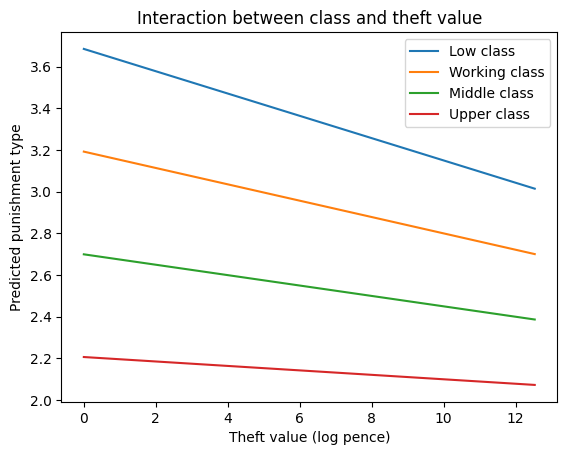

In [122]:
import matplotlib.pyplot as plt

for cls, label in zip([1, 2, 3, 4], ['Low class', 'Working class', 'Middle class', 'Upper class']):
    subset = pred_df[pred_df['occupation_code'] == cls]
    plt.plot(
        subset['log_value'],
        subset['predicted_punishment'],
        label=label
    )

plt.xlabel('Theft value (log pence)')
plt.ylabel('Predicted punishment type')
plt.title('Interaction between class and theft value')
plt.legend()
plt.show()


Here we can see very clearly that the higher class you are, the lower severity of punishment you are predicted to receive, but that otherwise the effect of the value of the theft is the same accross the board - highest penalties for lower value thefts and more leniency for higher value ones. 

Thinking about this within a historical contextualisation it may be interpretsble that higher value thefts are more likely to be repayable through fines (rated low [2] on the punishment scale) as they are likely to have result in financial gain, wheras low value thefts (food, clothes etc) are unlikely to be returnable, and more likely to be repeated (due to poverty or neccessity) and so somewhat illogically better punished harshly as a stronger deterent (a spinster who has stolen a bottle of gin won't keep stealing bottles of gin if she's dead). 

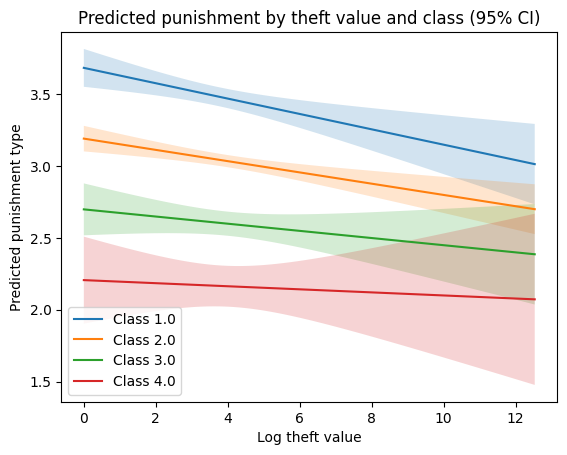

In [118]:
log_vals = np.linspace(
    theft_df['log_value'].min(),
    theft_df['log_value'].max(),
    200
)

classes = sorted(theft_df['occupation_code'].dropna().unique())

plt.figure()

for class_ in classes:
    pred_df = pd.DataFrame({
        'log_value': log_vals,
        'occupation_code': class_
    })

    # ci's
    pred = model.get_prediction(pred_df).summary_frame(alpha=0.05)

    # mean
    plt.plot(log_vals, pred['mean'], label=f'Class {class_}')

    plt.fill_between(
        log_vals,
        pred['mean_ci_lower'],
        pred['mean_ci_upper'],
        alpha=0.2
    )

plt.xlabel('Log theft value')
plt.ylabel('Predicted punishment type')
plt.title('Predicted punishment by theft value and class (95% CI)')
plt.legend()
plt.show()


This is just the same graph but with the inclusion of 95% confidence intervals - to demonstarte how broad the variation is that is represented by the lines. For each of these we can see that there is less variation in lower value theft punishments but much higher variation in high value. There is also much less variation across low class and much higer variation as you get to upper class - this might be partially caused by the higher numbers of low class data points providing better averages and predicitons, and the low quantities of high class data points resulting in much greater variability. 

In [119]:
for cls, label in zip([1, 2, 3, 4], ['Low', 'Working', 'Middle', 'Upper']):
    sub = theft_df[theft_df['occupation_code'] == cls]
    m = smf.ols('punishment_code ~ log_value', data=sub).fit()
    print(f"\n{label} class")
    print(m.params)



Low class
Intercept    3.683249
log_value   -0.028971
dtype: float64

Working class
Intercept    3.166975
log_value   -0.057372
dtype: float64

Middle class
Intercept    2.746577
log_value    0.005815
dtype: float64

Upper class
Intercept    0.128688
log_value    0.705826
dtype: float64


And finally I just wanted to run one final check to verify the findings - we can see by the intercepts that punishment severity is highly effected by class but that theft values effect is more variable - it has a small negative relationship with punishment for low and middle classes but almost no effect on the middle classes and a questionable impact for the upper classes - likely impacted by the low number of data points. 

### Hypothesis 3: Gender, Occupation, and Punishment Prediction

>**Null Hypothesis (H₀):** Defendant gender and occupation cannot predict punishment type. These variables have no relationship with the punishment received.

>**Alternative Hypothesis (H₁):** Defendant gender and occupation significantly predict punishment type, with certain occupations and female gender associated with more lenient punishments.


In [ ]:
# code

# Modelling
using visualisation tools to map our findings

In [ ]:
# plotly and seaborn here

# evaluating

What patterns can we see here?

In [ ]:
# written narrative here

# Visualising

Please open shiny app.py and run all cells to open the app.